In [1]:
import sys, os
os.chdir('/Users/nick/Documents/school/research/alpr-unconstrained-modified')
import keras
import cv2

from src.keras_utils 			import load_model
from glob 						import glob
from os.path 					import splitext, basename
from src.utils 					import im2single
from src.keras_utils 			import load_model, detect_lp
from src.label 					import Shape, writeShapes

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


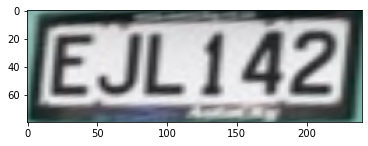

In [24]:
det_repo = '../EfficientLPR'
car_predictions_path = det_repo + '/predictions_phi0_nzvd.csv'
car_predictions = pd.read_csv(car_predictions_path)

lp_threshold = 0.5

wpod_net_path = "data/lp-detector/wpod-net_update1.h5"
wpod_net = load_model(wpod_net_path)

for i in range(len(car_predictions[:2])):
    sample = car_predictions.iloc[i]
    fname = sample[['file']].values.item()

    # read image
    im_path = det_repo + '/' + fname
    img = cv2.imread(im_path)
    src_image = img.copy()

    # get bbox
    x1, y1, x2, y2 = [int(x) for x in sample[['x1', 'y1', 'x2', 'y2']].values]

    # crop image to bbox
    img = img[y1:y2, x1:x2]

    im_shape = img.shape[:2]
    min_dim, max_dim = min(im_shape), max(im_shape)

    ratio = max_dim/min_dim
    side  = int(ratio*288)
    bound_dim = min(side + (side%(2**4)),608)


    lps, rectified_images, _ = detect_lp(wpod_net,img/255,bound_dim,2**4,(240,80),lp_threshold)

    if len(lps):
        best_idx = 0 # index of highest score
        lp = lps[0]
        rectified_image = rectified_images[0]
        plt.imshow(rectified_image)
        


    